In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Step 1: Load and preprocess the image
image_path = "/content/IMG20240803211947.jpg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128))  # Resize for consistency
image = image / 255.0  # Normalize pixel values to [0, 1]

In [ ]:

# Add noise to the image
noise_factor = 0.5
noisy_image = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
noisy_image = np.clip(noisy_image, 0.0, 1.0)  # Ensure values remain valid

In [ ]:
# Step 2: Prepare the autoencoder model
input_img = Input(shape=(128, 128, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [ ]:
# Step 3: Train the autoencoder
x_train = np.expand_dims(noisy_image, axis=0)  # Add batch dimension
y_train = np.expand_dims(image, axis=0)

autoencoder.fit(x_train, y_train, epochs=500, batch_size=1, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0785
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0631
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0515
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0439
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0427
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0447
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0442
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0413
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0385
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0371
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0370
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0372
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0370
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0360
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0344
Epoch 16/

In [ ]:
# Step 4: Denoise the image
denoised_image = autoencoder.predict(x_train)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


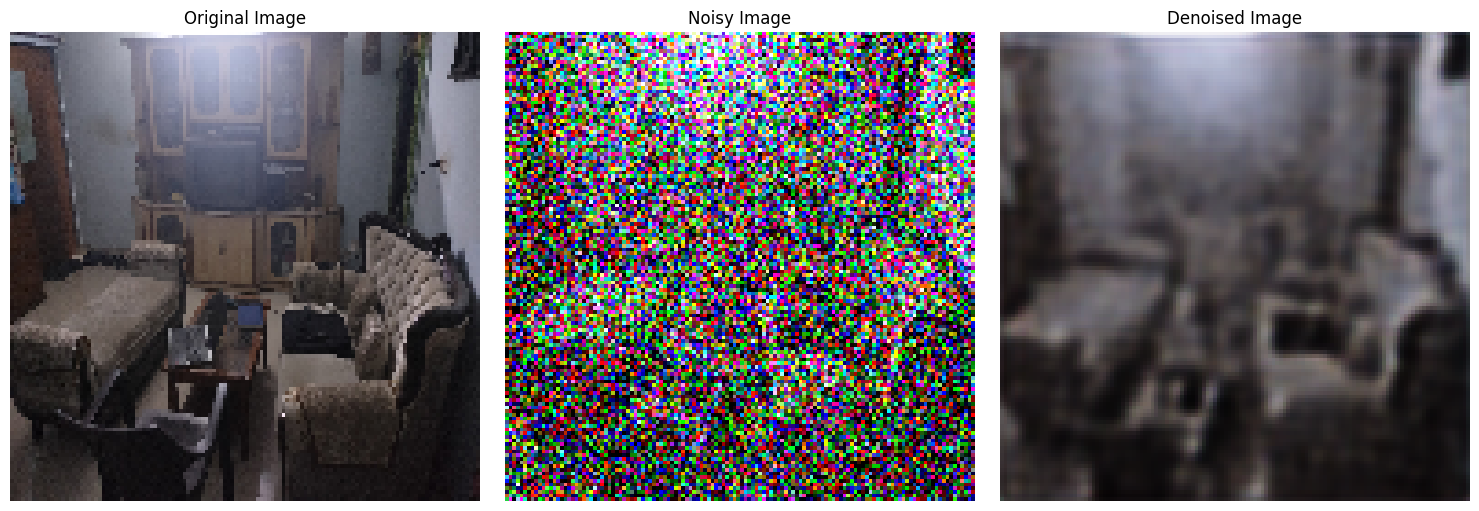

In [ ]:
# Step 5: Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Denoised Image")
plt.imshow(denoised_image)
plt.axis("off")

plt.tight_layout()
plt.show()
